# Equation of Time, Discontinuities, and Two Signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd

import pywt

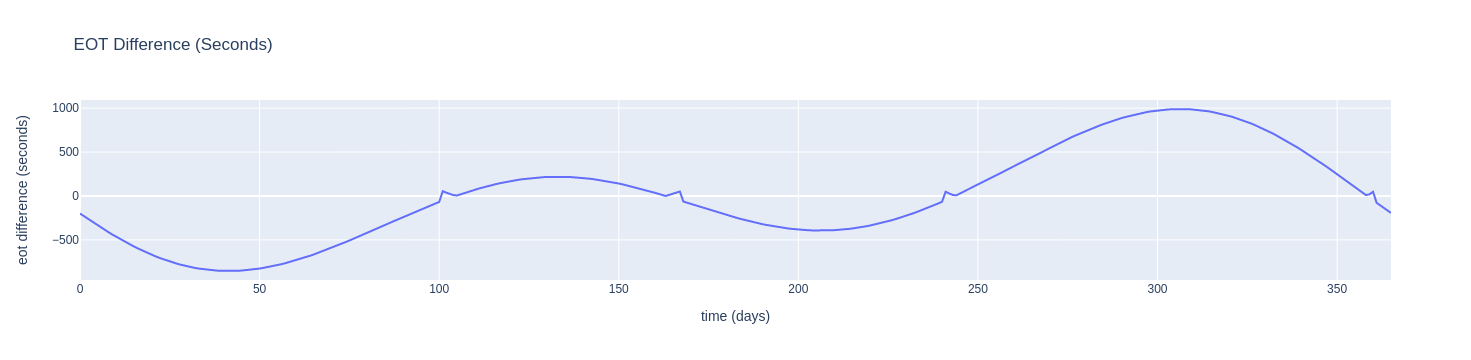

In [22]:
# Discontinuity in a signal
eot_data = np.genfromtxt("data/ppowers_discontinuity.csv", skip_header=1, delimiter=',')
eot_data = eot_data[:,1]
time_range = (np.arange(0, len(eot_data)))
eot_df = pd.DataFrame({'time (days)': time_range, 'eot difference (seconds)': eot_data})
eot_df.head(102)

# Plot data
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

fig = px.line(data_frame=eot_df, x="time (days)", y="eot difference (seconds)",
              title="EOT Difference (Seconds)")
fig.show()

size (19, 366) with 19 scales and 366 time steps
x-axis be default is: 366
y-axis be default is: 19


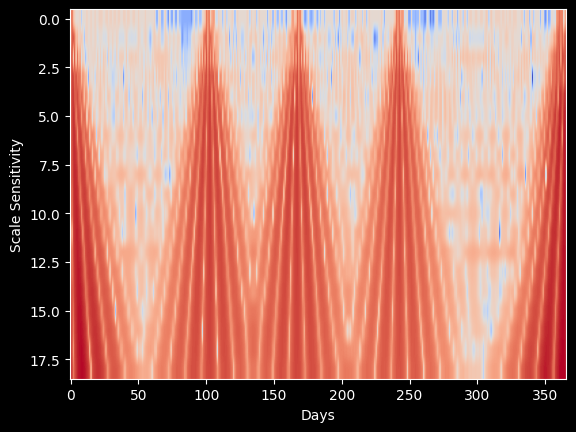

In [23]:
wavelet_mother = "morl" # morlet

# scale determines how squished or stretched a wavelet is
scales = np.arange(1, 20)
wavelet_coeffs, freqs = pywt.cwt(eot_data, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

# Plot scalogram
plt.style.use('dark_background')
data = np.log2(abs(wavelet_coeffs)) # compare the magntiude
plt.xlabel("Days")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.show()

In [24]:
# Corrected Data

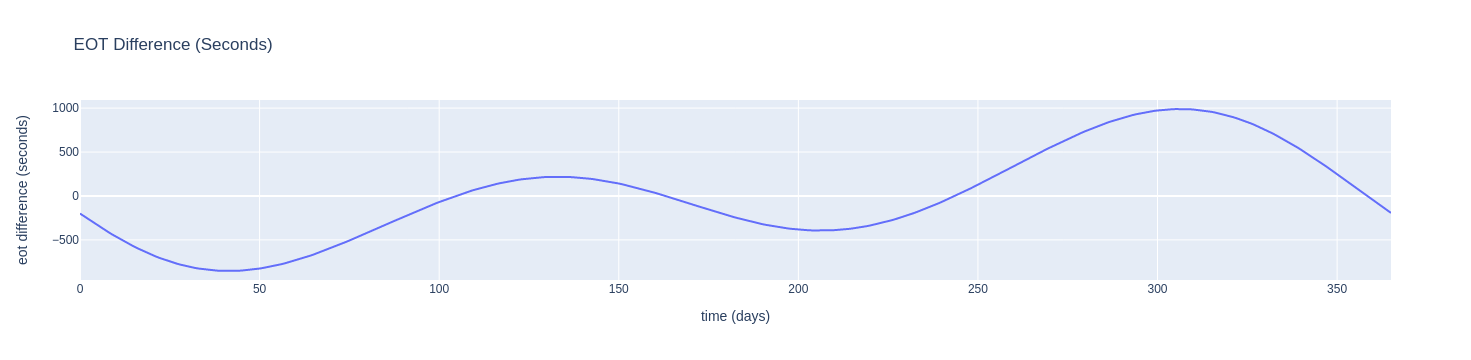

In [25]:
eot_data = np.genfromtxt("data/ppowers_csv.csv", skip_header=1, delimiter=',')
eot_data = eot_data[:,1]
time_range = (np.arange(0, len(eot_data)))
eot_df = pd.DataFrame({'time (days)': time_range, 'eot difference (seconds)': eot_data})

# Plot data
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

fig = px.line(data_frame=eot_df, x="time (days)", y="eot difference (seconds)",
              title="EOT Difference (Seconds)")
fig.show()

size (19, 366) with 19 scales and 366 time steps
x-axis be default is: 366
y-axis be default is: 19


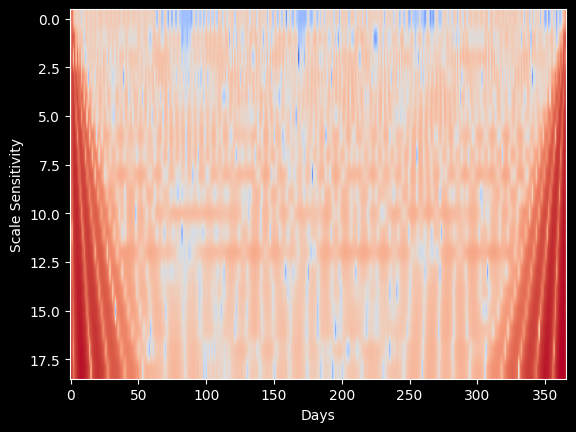

In [27]:
wavelet_mother = "morl" # morlet

# scale determines how squished or stretched a wavelet is
scales = np.arange(1, 20)
wavelet_coeffs, freqs = pywt.cwt(eot_data, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

# Plot scalogram
plt.style.use('dark_background')
data = np.log2(abs(wavelet_coeffs)) # compare the magntiude
plt.xlabel("Days")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.show()